In [1]:
import os
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load trained models
model_inception = load_model("InceptionV3_brain_tumor.h5")
model_vgg19 = load_model("VGG19_brain_tumor.h5")
model_mobilenet = load_model("MobileNetV2_brain_tumor.h5")

# Class names 
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Path to test dataset directory
test_dir = "Testing"  

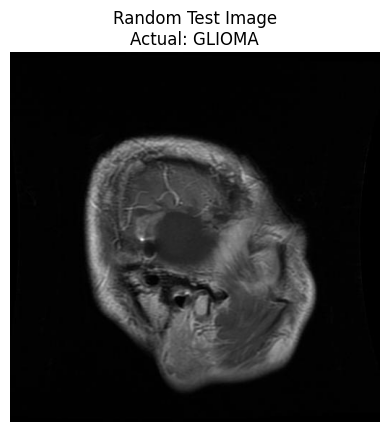

In [5]:
# Select a random image from the test dataset
selected_class = random.choice(class_names)
class_folder = os.path.join(test_dir, selected_class)
random_image = random.choice(os.listdir(class_folder))
img_path = os.path.join(class_folder, random_image)

# Show image
img_display = image.load_img(img_path)
plt.imshow(img_display)
plt.axis('off')
plt.title(f"Random Test Image\nActual: {selected_class.upper()}")
plt.show()

In [6]:
# Preprocessing
img_224 = image.load_img(img_path, target_size=(224, 224))
img_array_224 = np.expand_dims(image.img_to_array(img_224) / 255.0, axis=0)

img_299 = image.load_img(img_path, target_size=(299, 299))
img_array_299 = np.expand_dims(image.img_to_array(img_299) / 255.0, axis=0)

# Predictions from individual models
pred_inception = model_inception.predict(img_array_299)
pred_vgg19 = model_vgg19.predict(img_array_224)
pred_mobilenet = model_mobilenet.predict(img_array_224)

# Ensemble (Weighted Soft Voting)
final_prediction = (0.34 * pred_inception) + (0.33 * pred_vgg19) + (0.33 * pred_mobilenet)
ensemble_index = np.argmax(final_prediction)
ensemble_class = class_names[ensemble_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [7]:
def print_model_opinion(model_name, prediction):
    index = np.argmax(prediction)
    confidence = prediction[0][index]
    print(f"{model_name:<15} ➤ Predicts: {class_names[index].upper()}  (Confidence: {confidence:.4f})")

print("\n📋 Model Opinions:")
print_model_opinion("InceptionV3", pred_inception)
print_model_opinion("VGG19", pred_vgg19)
print_model_opinion("MobileNetV2", pred_mobilenet)

print(f"\nFinal Ensemble Prediction: {ensemble_class.upper()} (Confidence: {final_prediction[0][ensemble_index]:.4f})")
print(f"Ground Truth: {selected_class.upper()}")


📋 Model Opinions:
InceptionV3     ➤ Predicts: GLIOMA  (Confidence: 0.9997)
VGG19           ➤ Predicts: GLIOMA  (Confidence: 1.0000)
MobileNetV2     ➤ Predicts: GLIOMA  (Confidence: 1.0000)

Final Ensemble Prediction: GLIOMA (Confidence: 0.9999)
Ground Truth: GLIOMA
